In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_columns = 20
pd.options.display.max_rows = 20
pd.options.display.max_colwidth = 80
np.random.seed(12345)
plt.rc("figure", figsize=(10, 6))
np.set_printoptions(precision=4, suppress=True)
plt.rcParams["font.family"] = 'Malgun Gothic'


# 빅데이터 분석에 필요한 pandas의 데이터프레임의 반드시 알아야하는 핵심 기능 (7,8,9,10 장)
    * 데이터프레임 생성: pd.DataFrame() 함수를 사용하여 데이터프레임을 생성할 수 있다. 
    * 데이터프레임 인덱싱: loc 및 iloc 인덱서를 사용하여 데이터프레임의 특정 행과 열을 선택할 수 있다.
    * 데이터프레임 슬라이싱: 슬라이싱 연산자[start:end:setp]를 사용하여 데이터프레임의 부분을 선택할 수 있다.
    * 데이터프레임 필터링: 불리언 마스크(조건식)를 사용하여 데이터프레임의 행과 열을 필터링할 수 있다.
    * 데이터프레임 정렬: sort_values() / sort_index() 메서드를 사용하여 데이터프레임을 열 또는 인덱스별로 정렬할 수 있다.
    * 데이터프레임 집계: groupby() / agg()/ apply() 메서드를 사용하여 데이터프레임을 그룹화하고 집계 연산을 수행할 수 있다.
    * 데이터프레임 결측치/중복값 처리: fillna()/dropna() / drop_duplicates() 메서드를 사용하여 데이터프레임의 결측치를 채울 수 있다.
    * 데이터프레임 결합: merge() 또는 concat() 메서드를 사용하여 여러 데이터프레임을 결합할 수 있다.


## # 7장 데이터 정제 및 준비(Data Cleaning and Preparation)
* 7.1 누락된 데이터 처리하기
  * np.nan
  * None
  * isna() : 결측치에 대해 True 값으로 반환
  * dropna() : 결측치 제거하기
  * fillna() :결측값을 다른 값으로 채우는 데 사용


In [3]:
# ex : 다음 주어진 결측치을 담고 있는 데이터프레임에 대해 정제 작업하기
# DataFrame with NULL Values

data = np.random.standard_normal((7,3))#(행 크기, 열 크기)-> 21개의 랜덤 데이터
#df = pd.DataFrame(np.random.standard_normal(7, 3))

df = pd.DataFrame(data)
df.iloc[:4, 1] = np.nan
df.iloc[:2, 2] = np.nan
df

#1. 결측치 확인 및 처리

df.isna()

filtered = df.dropna()
filtered

#2. 색인 재설정
filtered.reset_index(drop=True)

#3. 결측치를 평균값으로 채우기\
df.fillna(df.mean())

0         1         2
0 -0.204708 -0.737098 -0.017173
1 -0.555730 -0.737098 -0.017173
2  0.092908 -0.737098  0.769023
3  1.246435 -0.737098 -1.296221
4  0.274992  0.228913  1.352917
5  0.886429 -2.001637 -0.371843
6  1.669025 -0.438570 -0.539741

7.2 Transformation
* duplicated()
  * 데이터프레임의 중복된 행 또는 값은 True로 표시되고, 중복되지 않은 행 또는 값은 False로 표시    
* drop_duplicates()
  * 데이터프레임의 모든 열을 고려하여 중복된 행 또는 값을 제거
    * subset: 중복된 행 또는 값을 제거하는 데 사용할 열의 리스트
    * keep: 다음 값 중 하나.
      * first: 첫 번째 중복된 행 또는 값을 유지.
      * last: 마지막 중복된 행 또는 값을 유지
      * False: 모든 중복된 행 또는 값을 제거.
      * inplace: DataFrame을 변경할지 여부를 표시.

In [4]:
# ex 데이터프레임의 중복 데이터 제거하기 
#dataframe with duplicated valiations?git 
data = pd.DataFrame({"k1": ["one", "two"] * 3 + ["two"],
                     "k2": [1, 1, 2, 3, 3, 5, 5]})


print(data)

#1. 중복된 데이터 확인
data.duplicated() # 

#2. 중복된 행 제거하기
data.drop_duplicates() # (keep)

#3. "K1" 열을 기준으로 중복된 행을 필터링하기
data.drop_duplicates(subset=['k1'])

    k1  k2
0  one   1
1  two   1
2  one   2
3  two   3
4  one   3
5  two   5
6  two   5


k1  k2
0  one   1
1  two   1

## 문제: 주어진 데이터셋를 정제하고 준비하여 다음 데이터 분석을 수행하시오.
* 데이터셋:


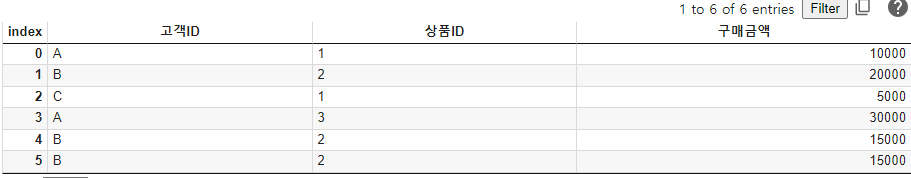
  * 고객별 구매 금액 합계
  * 상품별 구매 금액 합계
  * 고객별로 가장 많이 구매한 상품

In [51]:
# 데이터셋
data = [
  {"customer_id": "A", "product_id": "1", "amount": 10000},
  {"customer_id": "B", "product_id": "2", "amount": 20000},
  {"customer_id": "C", "product_id": "1", "amount": 5000},
  {"customer_id": "A", "product_id": "3", "amount": 30000},
  {"customer_id": "B", "product_id": "2", "amount": 15000},
  {"customer_id": "B", "product_id": "2", "amount": 15000}
]

In [52]:
# 데이터프레임 탐색하기
# 1. 데이터 프레임 탐색하기
# 1) 주어진 데이터셋을 데이터프레임으로 변환하기
df = pd.DataFrame(data)

# 2) 데이터프레임을 첫 행부터 3번째 행까지 슬라이싱하기
df.head(3)

# 3)데이터프레임의 열 레이블 변경하기
df.rename(columns={"customer_id":"고객ID","product_id":"상품ID","amount":"구매금액"}, inplace=True)
df

고객ID 상품ID   구매금액
0    A    1  10000
1    B    2  20000
2    C    1   5000
3    A    3  30000
4    B    2  15000
5    B    2  15000

In [7]:
# 데이터프레임 정제하기
# 1) 결측치 데이터 확인하기
df.isna()

# 2) 중복 데이터 확인하기
#df.duplicated(subset=["고객ID","상품ID","구매금액"], keep="first")
df.duplicated()
# 3) 중복 데이터 제거
df.drop_duplicates(subset=["고객ID","상품ID","구매금액"])

고객ID 상품ID   구매금액
0    A    1  10000
1    B    2  20000
2    C    1   5000
3    A    3  30000
4    B    2  15000

In [53]:
# 데이터프레임 정렬하기
# 1) 고객ID 와 상품ID의 값을 기준으로 데이터프레임의 행을 내림차순으로 정렬하기 : sort_values()
df = df.sort_values(by = ["고객ID"],  ascending = True)
df
# 2) 데이터프레임의 기존의 인덱스를 변경 또는 재설정하기
df = df.reset_index(drop=True)
df

고객ID 상품ID   구매금액
0    A    1  10000
1    A    3  30000
2    B    2  20000
3    B    2  15000
4    B    2  15000
5    C    1   5000

In [56]:
# 데이터분석하기
# 1) 고객별 구매 금액 합계를 계산하기
result = df.groupby(['고객ID'])['구매금액'].sum()
print(result)

고객ID
A    40000
B    50000
C     5000
Name: 구매금액, dtype: int64


In [57]:
# 2) 상품별 구매 금액 합계를 계산하기
result = df.groupby(['상품ID'])['구매금액'].sum()
print(result)

상품ID
1    15000
2    50000
3    30000
Name: 구매금액, dtype: int64


In [63]:
# 3) 상위 최우수 고객 2명 필터링하기
result = df.groupby("고객ID")["구매금액"].sum().sort_values(ascending=False)
print(result.head(2)) #2명
print(result.idxmax())

고객ID
B    50000
A    40000
Name: 구매금액, dtype: int64
B


In [71]:
# 4) 고객에서 가장 인기있는 상품 찾기
result = df['상품ID'].value_counts()
print(f"best product ID : {result.idxmax()}")

best product ID : 2


고객ID
A    20000.00
B    16666.67
C     5000.00
Name: 구매금액, dtype: float64


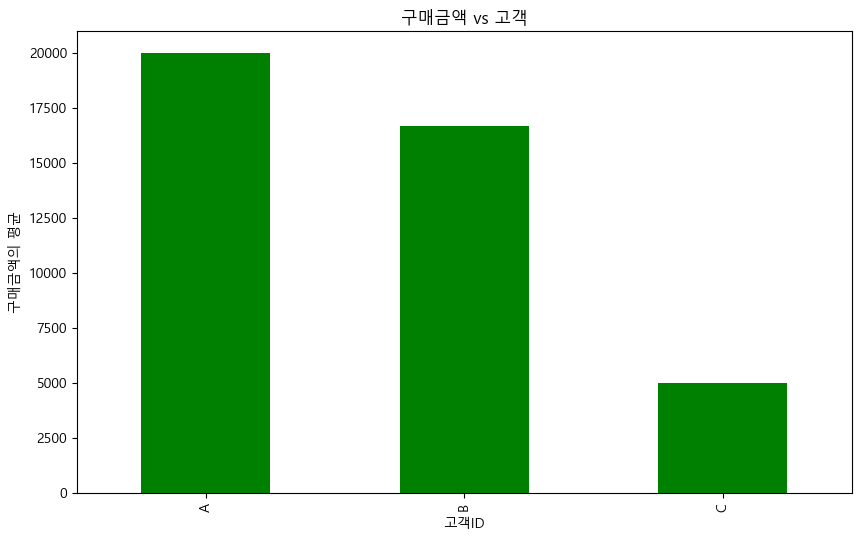

In [83]:
# 5) 고객ID별 구매금액의 평균를 계산하고, 그 결과를 막대그래프로 시각화하기
result = round(df.groupby(['고객ID'])['구매금액'].mean(),2)
print(result)

#result.plot.bar()
result.plot(kind= "bar", color = "green")

plt.title("구매금액 vs 고객")
plt.ylabel("구매금액의 평균")
plt.show()

In [14]:
# 6) 고객ID와 상품ID를 기준으로 그룹화하여 구매금액의 합계를 계산하고 시각화하기
result = (df.groupby(['고객ID','상품ID'])['구매금액'].sum())
print(result)

#result.plot.bar()
result.plot(kind= "bar", color = "green")

plt.title("구매금액 vs 고객ID,상품ID")
plt.ylabel("구매금액의 합산")
plt.xlabel("
plt.show()

# 8장 다중색인(mutiIndex)
* 다중색인(multi-index)은 데이터프레임이나 시리즈의 인덱스를 여러 열로 구성하는 것
* 다중색인 사용
  * 데이터를 여러 기준으로 그룹화
  * 데이터를 여러 기준으로 검색


In [21]:
# case1>
# 1. 단일 색인 -> 다중색인 생성

# 1) 단일 데이터프레임 생성
df = pd.DataFrame({'A': [1, 2, 3], 'B': [4, 5, 6]})
# print(df.index)
# print(df)
# print()
# 2) 다중 색인으로 사용할 튜플 리스트
index = [('X', 1), ('X', 2), ('Y', 1)]
# # 3) 다중색인 설정
multi_index = pd.MultiIndex.from_tuples(index)
# print(multi_index)

#4) 주어진 단일 데이터프레임에 다중 인덱스 적용
df.index=multi_index
print(df)
# print()
# print(df.index)

#2.다중색인 사용
#1) 데이터프레임을 계층적 색인의 첫 번째 인덱스 레벨을 기준으로 그룹화하기
grouped = df.groupby(level = 0)
#print(grouped)

# 2)각 그룹에 대한 정보 출력하기
for name, group in grouped:
    print(f"Group: {name}")
    print(group)
    print()

     A  B
X 1  1  4
  2  2  5
Y 1  3  6
Group: X
     A  B
X 1  1  4
  2  2  5

Group: Y
     A  B
Y 1  3  6



In [22]:
# case2> 
import pandas as pd

# 다중 인덱스를 가진 데이터프레임 생성
index = [['A', 'A', 'B', 'B'], [1, 2, 1, 2]] # 슌서를 갖고있는 
index = pd.MultiIndex.from_arrays(arrays, names=('first', 'second'))
df = pd.DataFrame({'data': [1, 2, 3, 4]}, index=index)
print(df)
print()
# # 첫 번째 인덱스 수준을 기준으로 그룹화
grouped = df.groupby(level=0)

# # 각 그룹에 대한 정보 출력
for name, group in grouped:
    print(f"Group: {name}")
    print(group)
    print()


NameError: name 'arrays' is not defined

In [25]:
# case 3=
# 1. 다중 색인 생성
df = pd.DataFrame({
    "data": [1, 2, 3, 4],
    "index1": ["A", "A", "B", "B"],
    "index2": [1, 2, 1, 2],
})
#print(df)

df = df.set_index(["index1", "index2"])
#print(df)
#print()

# 2.다중 색인 사용
grouped = df.groupby(level=0)
# 1)각 그룹에 대한 정보 출력
for name, group in grouped:
    print(f"Group: {name}")
    print(group)
    print()


Group: A
               data
index1 index2      
A      1          1
       2          2

Group: B
               data
index1 index2      
B      1          3
       2          4



In [31]:
# 2) 데이터셋 슬라이싱 :
print(df)
print()

df.loc["A", 1] # 레벨 0에서 "A" 선택, 레벨 1에서 1 선택

df.loc["B", :] # 레벨 0에서 "B" 선택, 레벨 1에서 모든 값 선택

df.loc[[('A', 1),('B',1)]] # 레벨 0에서 "A"와 "B" 선택, 레벨 1에서 1 선택

               data
index1 index2      
A      1          1
       2          2
B      1          3
       2          4



data
index1 index2      
A      1          1
B      1          3

### [문제]: 다음 DataFrame에서 고객ID와 상품ID를 기준으로 다중색인을 만들고, 각 그룹의 구매금액의 합계를 계산하세요.

In [43]:
import pandas as pd

data = [
    {"고객ID": "A", "상품ID": "1", "구매금액": 10000},
    {"고객ID": "B", "상품ID": "2", "구매금액": 20000},
    {"고객ID": "C", "상품ID": "1", "구매금액": 5000},
    {"고객ID": "A", "상품ID": "3", "구매금액": 30000},
    {"고객ID": "B", "상품ID": "2", "구매금액": 15000},
    {"고객ID": "B", "상품ID": "2", "구매금액": 15000}
]

# 1. 데이터프레임 생성
df = pd.DataFrame(data)

# 2. 고객ID와 상품ID를 기준으로 다중색인을 생성하여 데이터프레임 생성하기
df.set_index(["고객ID", "상품ID"], inplace=True)

# 3. 각 그룹의 구매금액 합계 계산
구매금액_합계 = df.groupby(level=[0, 1]).sum()

print(구매금액_합계)


            구매금액
고객ID 상품ID       
A    1     10000
     3     30000
B    2     50000
C    1      5000


In [44]:
import pandas as pd

data = [
    {"고객ID": "A", "상품ID": "1", "구매금액": 10000},
    {"고객ID": "B", "상품ID": "2", "구매금액": 20000},
    {"고객ID": "C", "상품ID": "1", "구매금액": 5000},
    {"고객ID": "A", "상품ID": "3", "구매금액": 30000},
    {"고객ID": "B", "상품ID": "2", "구매금액": 15000},
    {"고객ID": "B", "상품ID": "2", "구매금액": 15000}
]

# 데이터프레임 생성
df = pd.DataFrame(data)

# 고객을 기준으로 묶어서 구매금액의 합 계산
고객별_구매금액_합 = df.groupby("고객ID")["구매금액"].sum()

# 상품을 기준으로 묶어서 구매금액의 합 계산
상품별_구매금액_합 = df.groupby("상품ID")["구매금액"].sum()

# 결과 출력
print("고객별 구매금액 합:")
print(고객별_구매금액_합)
print()
print("상품별 구매금액 합:")
print(상품별_구매금액_합)


고객별 구매금액 합:
고객ID
A    40000
B    50000
C     5000
Name: 구매금액, dtype: int64

상품별 구매금액 합:
상품ID
1    15000
2    50000
3    30000
Name: 구매금액, dtype: int64


# 9.2장. plotting with pandas and seaborn


효과적인 막대 그래프의 설명을 보완해보겠습니다:

*막대 그래프*는 범주형 데이터의 빈도, 비율 또는 백분율을 시각화하는 데 효과적입니다. 막대 그래프는 다음과 같은 목적으로 사용됩니다:

- 빈도 분포 표시: 각각의 막대는 특정 항목의 빈도를 나타내며, 막대의 높이는 해당 항목의 빈도에 비례합니다. 이를 통해 범주별 빈도를 시각적으로 비교할 수 있습니다.
- 비율 또는 백분율 표시: 각 범주의 전체에 대한 비율 또는 백분율을 나타내어, 범주들 간의 중요성이나 상대적 크기를 비교하는 데 도움을 줍니다.
- 시계열 데이터 표시: 시간에 따른 변화를 보여줄 때 유용합니다. 각 시점 또는 기간에 대한 데이터를 각각의 막대로 표현할 수 있습니다.
- 다중 변수의 비교: 여러 범주에 대한 여러 그룹 간의 비교를 수행할 수 있습니다. 이를 통해 각 그룹 간의 차이를 직관적으로 이해할 수 있습니다.

              A         B         C         D
one    0.152139  0.771374  0.255412  0.127543
two    0.665167  0.412805  0.667768  0.659814
three  0.305378  0.201224  0.222027  0.119971
four   0.037145  0.034132  0.230497  0.228354
five   0.624911  0.892561  0.779728  0.721451
six    0.310442  0.363083  0.196082  0.935492


<Axes: >

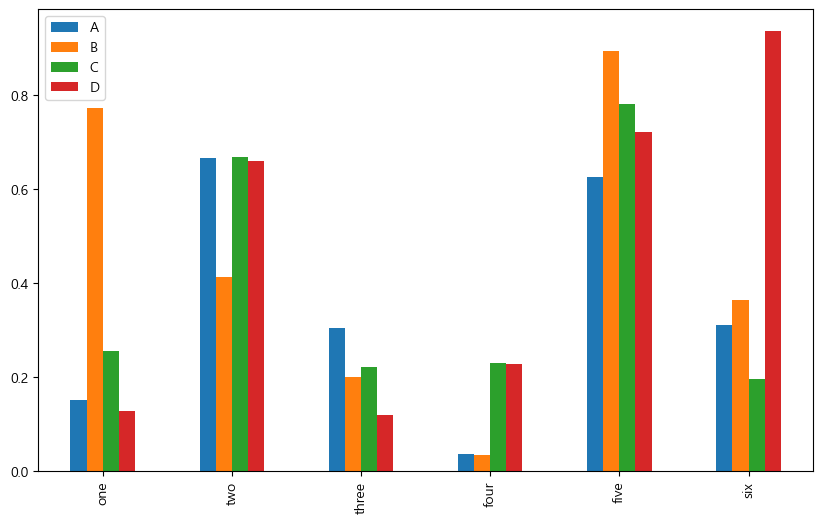

In [53]:
# ex> bar plot 사용법 ex> pandas-dataFrame 의 plot.bar():bar plot 사용법
#1. DataSet 준비
#1. DataSet
data = np.random.uniform(size = (6,4)) #24개 데이터

#데이터프레임 생성
df = pd.DataFrame(data,
                  index = ["one", "two", "three", "four", "five", "six"],
                  columns = ["A","B", "C", "D"])
print(df)
#3. 그래프 그리기 
df.plot.bar()

## [예제]
* 'examples/tips.csv'을 로딩하여 'day'별에 따라 'size' 인원별 팁의 백분율을 보여주는 쌓인 막대 그래프를 그리기

In [67]:
# 1. Load a dataset
tips = pd.read_csv('examples/tips.csv') # 데이터 프레임

# # 2. 데이터프레임 생성 : 빈도수 표 만들기
# party_counts = pd.crosstab(tips["day"], tips['size'])
# print(party_counts)

# #3. 인덱스 재설정- 
# party_counts = party_counts.reindex(index = ["Thur","Fri","Sat","Sun"])
# print(party_counts)

# # ## 3. 필터링 - 불필요한 데이터 삭제
# party_counts = party_counts.loc[:,2:5]
# print(party_counts)


# # # 4. 데이터 정규화 작업: 데이터 -> 비율로 계산
# #데이터의 분포가 4자리 막 5자리 이렇게 가는경우 이것을 0~1로 설정해주면 그래프로 아주 올바르게 작업 할 수 있음
# party_pcts = party_counts.div(party_counts.sum(axis = "columns"),
#                                axis = "index")
# print(party_pcts)

# # # 5. 막대그래프로 그리기
# party_pcts.plot.bar()

# # # 6. 팁의 백분율 열 추가하기

tips["tip_pct"] = tips['tip'] / (tips['total_bill'] - tips['tip'])
print(tips)
#sns.barplot(x = "tip_pct", y='day', data=tips, orient='h', hue='time')

     total_bill   tip smoker   day    time  size   tip_pct
0         16.99  1.01     No   Sun  Dinner     2  0.063204
1         10.34  1.66     No   Sun  Dinner     3  0.191244
2         21.01  3.50     No   Sun  Dinner     3  0.199886
3         23.68  3.31     No   Sun  Dinner     2  0.162494
4         24.59  3.61     No   Sun  Dinner     4  0.172069
..          ...   ...    ...   ...     ...   ...       ...
239       29.03  5.92     No   Sat  Dinner     3  0.256166
240       27.18  2.00    Yes   Sat  Dinner     2  0.079428
241       22.67  2.00    Yes   Sat  Dinner     2  0.096759
242       17.82  1.75     No   Sat  Dinner     2  0.108899
243       18.78  3.00     No  Thur  Dinner     2  0.190114

[244 rows x 7 columns]


## [문제] 다음 주어진 데이터셋에서 다음 작업을 수행하시오.
  * 나이가 30세 이상인 사람들의 이름을 출력하기
  * 도시가 'New York' 또는 'Los Angeles'인 사람들의 나이의 평균을 출력하기
  * 이름이 'Bob'인 사람의 도시를 출력하기

In [ ]:
# dataset
data = {
    'Name': ['John', 'Mary', 'Bob', 'Alice', 'Tom'],
    'Age': [20, 25, 30, 35, 40],
    'City': ['New York', 'Los Angeles', 'Chicago', 'Houston', 'Dallas']
}

In [ ]:
# 1. 나이가 30세 이상인 사람들의 이름 출력하기



In [ ]:
# 2. 도시가 'New York' 또는 'Los Angeles'인 사람들의 나이의 평균을 출력하기



In [ ]:
# 3. 이름이 'Bob'인 사람의 도시를 출력하기



# 10장 데이터 집계와 그룹 연산
* 하나 이상의 키(함수, 배열, 데이터프레임의 열 이름)를 이용해서 판다스 객체를 여러 조각으로 나누는 방법
* 합계, 평균, 표준편차, 사용자 정의 함수 같은 그룹 요약 통계를 계산하는 방법
* 정규화, 선형 회귀, 순위 또는 부분집합 선택 같은 그룹 내 변형이나 다른 조작을 적용하는 방법

* groupby() 연산에 대한 원리
    * 분리-적용-결합(split-apply-combine)
    * Aggregations refer to any data transformation that produces scalar values from arrays. 

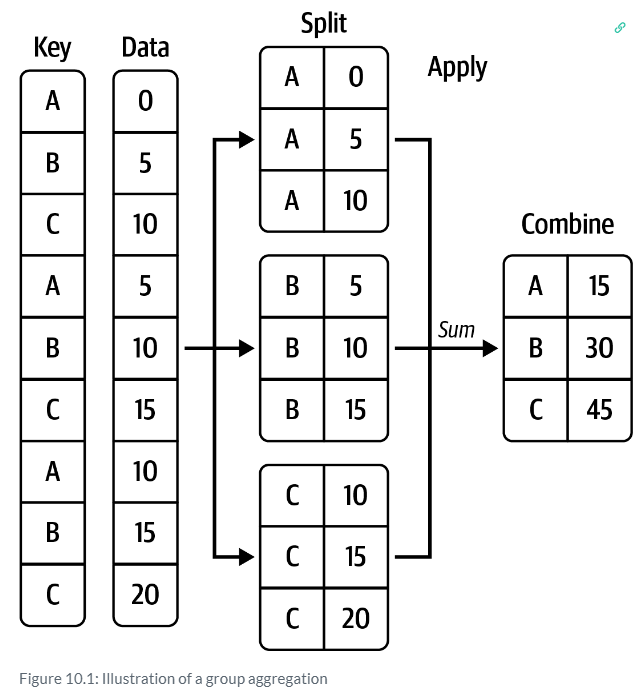

### [예제] 주어진 데이터를 key1으로 묶고 각 그룹에서 data1의 평균을 구하기

In [14]:
# 데이터셋
dataset = {"key1" : ["a", "a", None, "b", "b", "a", None],
                   "key2" : pd.Series([1, 2, 1, 2, 1, None, 1],
                                      dtype="Int64"),
                   "data1" : np.random.standard_normal(7),
                   "data2" : np.random.standard_normal(7)}
df = pd.DataFrame(dataset)
df
df.index #RangeIndex

RangeIndex(start=0, stop=7, step=1)

* groupby()
    * df.groupby(["컬럼명1","컬럼명2"]).함수()
    * df.groupby(["컬럼명1","컬럼명2"])[["컬럼명1",...]].함수()

In [23]:
# mean() - 주어진 데이터을 컬럼을 사용하여 각 그룹으로 묶어 평균 집계 
## 그룹 색인에서 누락된 값은 기본적으로 결과에서 제외됨
print(df)
print()
#result = df.groupby(["key1"]).mean() #a,b 나눠서 만들기
#result = df.groupby(["key1"]).size() # 몇개가 있는지 알아보기
#result = df.groupby(["key1"]).count() # column별로 각 그룹에 속하는 데이터 개수 나타내기!
#result = df.groupby(["key1"]).sum() #column별로 각 그룹에 속하는 데이터의 합산

# result = df.groupby("key2").mean(numeric_only=True) # key1열이 결과에서 빠짐: df['key1']은 숫자 데이터가 아님
# print(result)
result = df.groupby(["key1", "key2"]).sum() #다중색인 데이터프레임(multiindex(key1,key2))
result.index

# # 특히 대용량 데이터셋을 다룰 때 소수의 열(data2)만 집계(평균)하기
result = df.groupby(["key1", "key2"])[["data2"]].mean()
print(result)

   key1  key2     data1     data2
0     a     1  1.352917  0.476985
1     a     2  0.886429  3.248944
2  None     1 -2.001637 -1.021228
3     b     2 -0.371843 -0.577087
4     b     1  1.669025  0.124121
5     a  <NA> -0.438570  0.302614
6  None     1 -0.539741  0.523772

              data2
key1 key2          
a    1     0.476985
     2     3.248944
b    1     0.124121
     2    -0.577087


## 예제: 10.2.1 열에 여러 가지 함수 적용하기
* Column-Wise and Multiple Function Application


* agg()
  * df.groupby()[컬럼 리스트].agg([집계함수 리스트]) 
  * 데이터프레임의 모든 열을 집계하려면 mean이나 std 같은 메서드를 호출하거나 agg를 통해 원하는 함수를 사용
  * 열에 따라 다른 함수를 사용해서 집계를 수행하거나 여러 개의 함수를 한 번에 적용하기

In [24]:
# 데이터셋 가져오기
tips = pd.read_csv("examples/tips.csv")
tips.head()

total_bill   tip smoker  day    time  size
0       16.99  1.01     No  Sun  Dinner     2
1       10.34  1.66     No  Sun  Dinner     3
2       21.01  3.50     No  Sun  Dinner     3
3       23.68  3.31     No  Sun  Dinner     2
4       24.59  3.61     No  Sun  Dinner     4

In [29]:
# total_bill에서 팁의 비율을 tip_pct 열에 출가하기
tips["tip_pct"] = tips["tip"] / tips["total_bill"] * 100
tips.head()

total_bill   tip smoker  day    time  size    tip_pct
0       16.99  1.01     No  Sun  Dinner     2   5.944673
1       10.34  1.66     No  Sun  Dinner     3  16.054159
2       21.01  3.50     No  Sun  Dinner     3  16.658734
3       23.68  3.31     No  Sun  Dinner     2  13.978041
4       24.59  3.61     No  Sun  Dinner     4  14.680765

In [30]:
# ex1
grouped = tips.groupby(["day", "smoker"])
grouped_pct = grouped["tip_pct"]
#grouped_pct.mean()
result = grouped(["dau", "smoker"]) ["tip_pct]  # 기술 통계에서는 함수 이름을 문자열로 넘기기
print(result)

                  mean
day  smoker           
Fri  No      15.165044
     Yes     17.478305
Sat  No      15.804766
     Yes     14.790607
Sun  No      16.011294
     Yes     18.725032
Thur No      16.029808
     Yes     16.386327


In [34]:
 # ex2
def diff(arr):
    return arr.max()-arr.min()
result = tips.groupby(["day","smoker"])["tip_pct"].agg([diff,"mean","std"])
print(result)
#grouped_pct.agg(["mean", "std"])  #함수 이름을 열 이름으로 하는 데이터프레임을 얻는다.

                  diff       mean        std
day  smoker                                 
Fri  No       6.734944  15.165044   2.812295
     Yes     15.992499  17.478305   5.129267
Sat  No      23.519300  15.804766   3.976730
     Yes     29.009476  14.790607   6.137495
Sun  No      19.322576  16.011294   4.234723
     Yes     64.468495  18.725032  15.413424
Thur No      19.335021  16.029808   3.877420
     Yes     15.124046  16.386327   3.938881


In [35]:
# ex3 데이터프레임은 열마다 다른 함수를 적용하거나 여러 개의 함수를 모든 열에 적용하기
functions = ["count", "mean", "max",diff]
result = tips.groupby(["day","smoker"])[["tip_pct","total_bill"]].agg(functions)# 데이터프레임은 계층적인 열로 구성
print(result)

            tip_pct                                  total_bill             \
              count       mean        max       diff      count       mean   
day  smoker                                                                  
Fri  No           4  15.165044  18.773467   6.734944          4  18.420000   
     Yes         15  17.478305  26.348039  15.992499         15  16.813333   
Sat  No          45  15.804766  29.198966  23.519300         45  19.661778   
     Yes         42  14.790607  32.573290  29.009476         42  21.276667   
Sun  No          57  16.011294  25.267250  19.322576         57  20.506667   
     Yes         19  18.725032  71.034483  64.468495         19  24.120000   
Thur No          45  16.029808  26.631158  19.335021         45  17.113111   
     Yes         17  16.386327  24.125452  15.124046         17  19.190588   

                           
               max   diff  
day  smoker                
Fri  No      22.75  10.29  
     Yes     40.17  34.42  
S

## # 10.2.2 색인되지 않은 형태로 집계된 데이터 반환하기
* 집계된 데이터는 유일한 그룹 키 조합으로 (어떤 경우에는 계층적 색인)되어 반환되었다.
* groupby메서드에 as_index=False를 넘겨서 색인 작업을 비활성화

In [40]:
grouped = tips.groupby(["day", "smoker"], as_index=False) #데이터프레임 평탄화
grouped.mean(numeric_only=True)

day smoker  total_bill       tip      size    tip_pct
0   Fri     No   18.420000  2.812500  2.250000  15.165044
1   Fri    Yes   16.813333  2.714000  2.066667  17.478305
2   Sat     No   19.661778  3.102889  2.555556  15.804766
3   Sat    Yes   21.276667  2.875476  2.476190  14.790607
4   Sun     No   20.506667  3.167895  2.929825  16.011294
5   Sun    Yes   24.120000  3.516842  2.578947  18.725032
6  Thur     No   17.113111  2.673778  2.488889  16.029808
7  Thur    Yes   19.190588  3.030000  2.352941  16.386327

## # 10.3 apply 메서드 : 일반적인 분리-적용-병합
* apply() 메서드는 groupby 메서드의 가장 일반적인 메서드
* apply 메서드는 객체를 여러 조각으로 나누고, 전달된 함수를 각 조각에 일괄적으로 적용한 후 이를 다시 합친다.
* df.groupby().apply(함수, 함수의 인자값 설정,...)

In [44]:
# 특정 열에서 가장 큰 값을 갖는 행을 선택하는 함수 정의
def top(df, n=5, column="tip_pct"):
    return df.sort_values(column, ascending=False)[:n]
# top 호출
top(tips, n=3)

total_bill   tip smoker  day    time  size    tip_pct
172        7.25  5.15    Yes  Sun  Dinner     2  71.034483
178        9.60  4.00    Yes  Sun  Dinner     2  41.666667
67         3.07  1.00    Yes  Sat  Dinner     1  32.573290

In [50]:
result = tips.groupby(["smoker", "day"]).apply(top, n=1, column="total_bill")
print(result)

                 total_bill    tip smoker   day    time  size    tip_pct
smoker day                                                              
No     Fri  94        22.75   3.25     No   Fri  Dinner     2  14.285714
       Sat  212       48.33   9.00     No   Sat  Dinner     4  18.621974
       Sun  156       48.17   5.00     No   Sun  Dinner     6  10.379905
       Thur 142       41.19   5.00     No  Thur   Lunch     5  12.138869
Yes    Fri  95        40.17   4.73    Yes   Fri  Dinner     4  11.774956
       Sat  170       50.81  10.00    Yes   Sat  Dinner     3  19.681165
       Sun  182       45.35   3.50    Yes   Sun  Dinner     3   7.717751
       Thur 197       43.11   5.00    Yes  Thur   Lunch     4  11.598237


C:\Users\moon\AppData\Local\Temp\ipykernel_17212\1563265740.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = tips.groupby(["smoker", "day"]).apply(top, n=1, column="total_bill")


## [문제] 
* 고객ID와 상품ID를 기준으로 그룹화하여 구매금액의 평균을 계산하고, 그 결과를 상품ID순으로 출력하세요.

In [ ]:
df = pd.DataFrame({
    "고객ID": [1, 2, 1, 3, 2, 3],
    "상품ID": [101, 102, 103, 101, 103, 102],
    "구매금액": [10000, 20000, 30000, 40000, 50000, 60000]
})

# 고객ID와 상품ID을 기준으로 그룹화하여 구매금액의 평균을 계산
average_spent_by_customer_product = df.groupby(["고객ID", "상품ID"])["구매금액"].mean()

# 상품ID을 기준으로 정렬하기
average_spent_by_customer_product = average_spent_by_customer_product.sort_index(level = "상품ID")
print(average_spent_by_customer_product)

# 막대그래프로 시각화하기
average_spent_by_customer_product.plot.bar()


# 그래프 부가 정보 추가하기
plt.title("Average Purchase Amount by Product ID")
plt.xlabel("Product ID")
plt.ylabel("Average Purchase Amount")
plt.show()